Linear Regression

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets,model_selection

In [2]:
california = datasets.fetch_california_housing()
x = california["data"]
y = california["target"]

X_train, X_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.1)
# (20640,) (20640,8) 

n = X_train.shape[0]
y_train = np.log1p(y_train)
y_test = np.log1p(y_test)



In [3]:
X_train.shape

(18576, 8)

In [4]:
def gradientDescent(y_exp, y_pred,x, n):
    error = y_exp-y_pred
    slope_gradient = (-1/2*n)* np.dot(x.T, error)
    intercept_gradient =  (-1/2*n)*np.sum(error)
    return slope_gradient, intercept_gradient    
    

In [5]:
def predict(x, slope, intercept):
    return np.dot(x, slope) + intercept


In [6]:
def train(x,y,slope,intercept,learningRate, iterations, n):
    for _ in range(iterations):
        y_pred = predict(x,slope,intercept)
        slope_gradient, intercept_gradient = gradientDescent(y,y_pred, x,n)

        slope -= slope_gradient*learningRate
        intercept -= intercept_gradient*learningRate
        print(slope, intercept)

    return slope, intercept
        # y_line = slope*x + intercept
        # plt.plot(y, y_line,color='k')z

In [10]:
slope = np.zeros(X_train.shape[1])
intercept = np.zeros(1)
learningRate = 0.000000000000001
iterations = 2000
slope, intercept = train(X_train, y_train,slope,intercept, learningRate, iterations, n)
y_pred = predict(X_test,slope,intercept)

[ 7.82112105e-07  5.26729418e-06  1.00762245e-06  1.97857422e-07
  2.59898311e-04  5.46580479e-07  6.46083139e-06 -2.17619273e-05] [1.81969078e-07]
[ 1.31400572e-06  8.88115627e-06  1.67387998e-06  3.26540231e-07
  3.69586120e-04  8.53878894e-07  1.06340561e-05 -3.58183089e-05] [2.99409918e-07]
[ 1.73984642e-06  1.17938283e-05  2.19543531e-06  4.25900652e-07
  4.15713617e-04  1.05982826e-06  1.38376544e-05 -4.66086765e-05] [3.89500506e-07]
[ 2.12063716e-06  1.44082472e-05  2.65550535e-06  5.12801964e-07
  4.34946288e-04  1.22279418e-06  1.66293231e-05 -5.60115964e-05] [4.67972525e-07]
[ 2.48219116e-06  1.68949150e-05  3.08930307e-06  5.94379815e-07
  4.42798902e-04  1.36747381e-06  1.92450502e-05 -6.48219784e-05] [5.4148279e-07]
[ 2.83543131e-06  1.93259803e-05  3.51172894e-06  6.73653669e-07
  4.45836439e-04  1.50431770e-06  2.17846942e-05 -7.33761898e-05] [6.12848142e-07]
[ 3.18497978e-06  2.17319742e-05  3.92908826e-06  7.51901250e-07
  4.46836828e-04  1.63774805e-06  2.42905115e-05

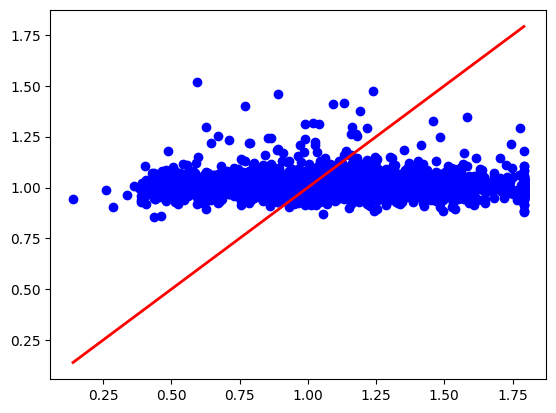

In [11]:

plt.scatter(y_test, y_pred, color='blue', label='Predicted vs. Actual')
plt.plot([min(y_train),max(y_train)],[min(y_train),max(y_train)],color='red', linewidth='2')
plt.show()

In [12]:
mse = np.mean((y_test - y_pred)**2)
sstot = np.mean((y_test - np.mean(y_test))**2)
r2 = 1-(mse/sstot)
print("MSE:", mse, r2)

MSE: 0.13266283168108528 -0.04384315271910766
